#### Scatterplots and Correlation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('fuel-econ.csv')
print(df.shape)
df.head(5)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


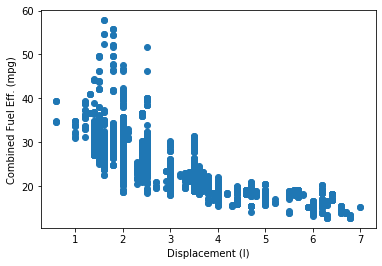

In [3]:
plt.scatter(data=df,x='displ',y='comb');
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

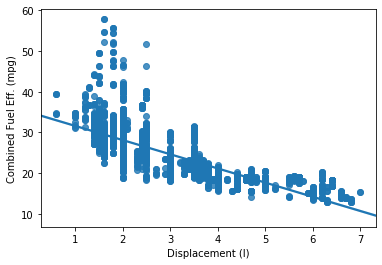

In [4]:
sns.regplot(data=df, x='displ',y='comb');
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

In [5]:
df_copy = df.copy()

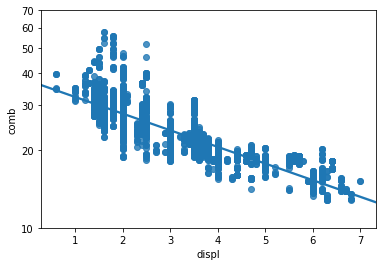

In [6]:
def log_trans(x, inverse=False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10,x)
    
sns.regplot(df_copy['displ'],df_copy['comb'].apply(log_trans))
tick_locs = [10,20,30,40,50,60,70]
plt.yticks(log_trans(tick_locs),tick_locs);

#### Overplotting, Transparency, and Jitter

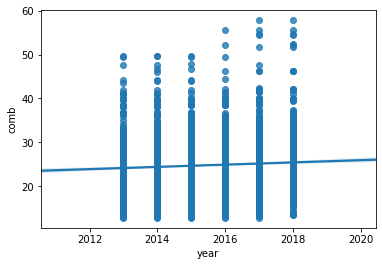

In [7]:
sns.regplot(data=df, x='year',y='comb');

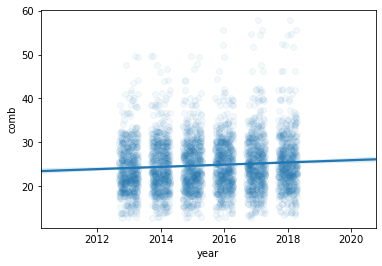

In [8]:
sns.regplot(data=df, x='year',y='comb',x_jitter=0.3,
          scatter_kws={'alpha':1/20} );

#### Heat Maps

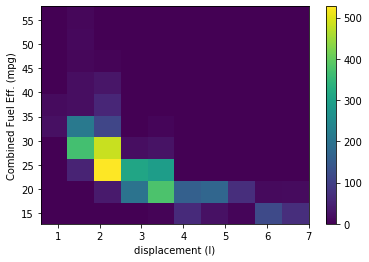

In [9]:
plt.hist2d(data=df,x='displ',y='comb');
plt.colorbar()
plt.xlabel('displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

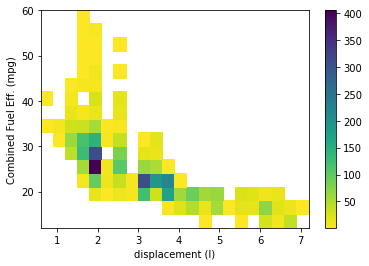

In [10]:
bins_x =np.arange(0.6,7+0.3,0.3)
bins_y =np.arange(12,58+3,3)
plt.hist2d(data=df,x='displ',y='comb',cmin = 0.5,
          cmap='viridis_r',bins = (bins_x,bins_y));
plt.colorbar()
plt.xlabel('displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

In [11]:
df[['displ','comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


#### Violin Plots

In [12]:
df2=df.copy()

In [13]:
sedan_classes=['Minicompact Cars','Subcompact Cars','Compact Cars','Midsize Cars','Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered =True, categories = sedan_classes)
df2['VClass']=df2['VClass'].astype(vclasses);


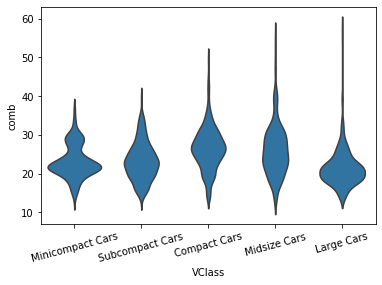

In [14]:
base_color=sns.color_palette()[0]
sns.violinplot(data=df2, x='VClass',y='comb',
               color=base_color,inner=None);
plt.xticks(rotation=15);

#### Box Plots

(6.966470319355816, 63.09321945242605)

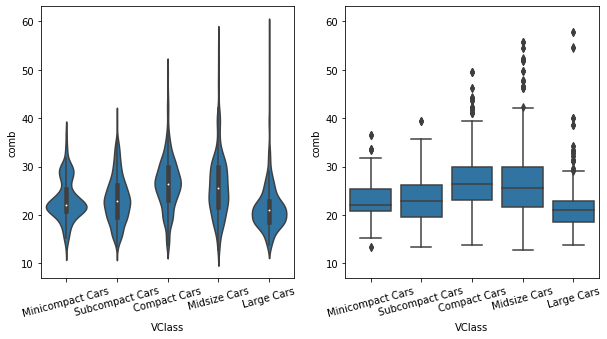

In [15]:
base_color=sns.color_palette()[0]
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
ax1=sns.violinplot(data=df2,x='VClass',y='comb',
              color=base_color);
plt.xticks(rotation=15)

plt.subplot(1,2,2)
sns.boxplot(data=df2, x='VClass',y='comb',
               color=base_color);
plt.xticks(rotation=15);
plt.ylim(ax1.get_ylim())



#### Clustered Bar Charts

In [19]:
df_copy['trans_type']=df_copy['trans'].apply(lambda x: x.split()[0]);

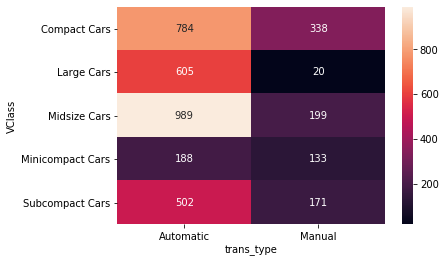

In [24]:
sns.heatmap(ct_counts,annot=True, fmt='d');

In [23]:
ct_counts=df_copy.groupby(['VClass','trans_type']).size()
ct_counts=ct_counts.reset_index(name='count')
ct_counts =ct_counts.pivot(index='VClass',columns='trans_type',values='count')
ct_counts

trans_type,Automatic,Manual
VClass,,
Compact Cars,784,338
Large Cars,605,20
Midsize Cars,989,199
Minicompact Cars,188,133
Subcompact Cars,502,171


In [50]:
ct_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
VClass        10 non-null object
trans_type    10 non-null object
count         10 non-null int64
dtypes: int64(1), object(2)
memory usage: 320.0+ bytes


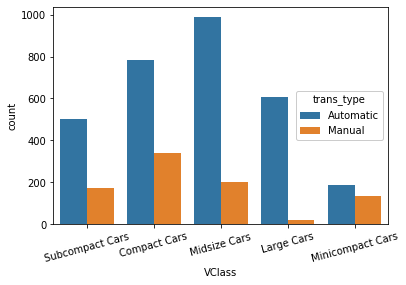

In [67]:
ax= sns.countplot(data=df_copy, x='VClass',hue='trans_type');
plt.xticks(rotation=15);
ax.legend(loc=5,ncol=1, framealpha=1, title = 'trans_type')


#### Faceting

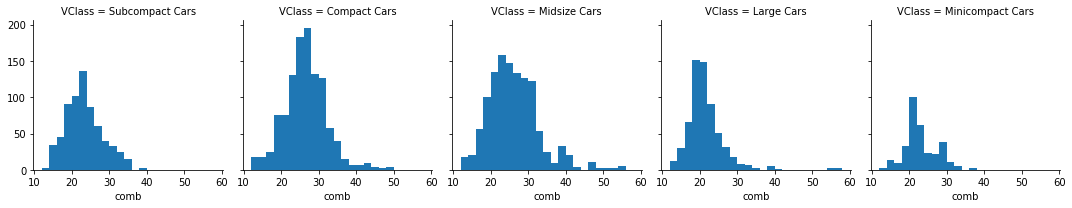

In [71]:
bins=np.arange(12,58+2,2)
g=sns.FacetGrid(data=df_copy, col='VClass');
g.map(plt.hist,'comb',bins=bins);

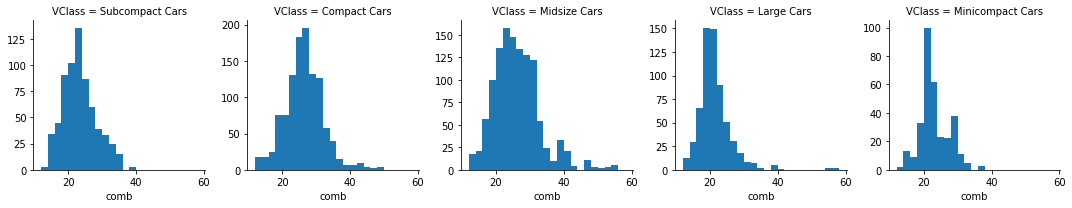

In [72]:
bins=np.arange(12,58+2,2)
g=sns.FacetGrid(data=df_copy, col='VClass',sharey=False);
g.map(plt.hist,'comb',bins=bins);

#### Adaptation of Univariate Plots

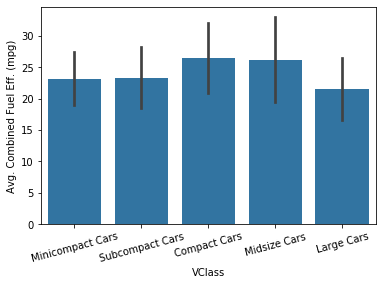

In [75]:
base_color=sns.color_palette()[0]
sns.barplot(data=df2, x='VClass',y='comb',
           color = base_color,ci='sd');
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

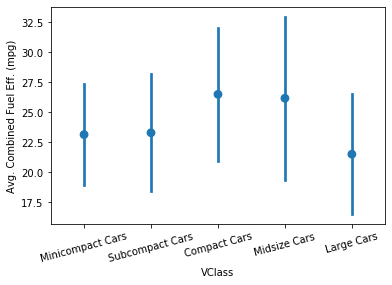

In [79]:
sns.pointplot(data=df2, x='VClass',y='comb',
           ci='sd',linestyles="");
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

#### Line Plots

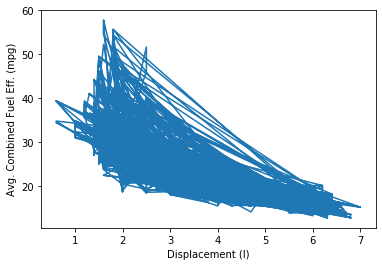

In [97]:
plt.errorbar(data=df2, x='displ',y='comb');
plt.xlabel('Displacement (l)')
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

In [104]:
bins_e=np.arange(0.6,7+0.2,0.2)
bins_c=bins_e[:-1]+0.1

displ_binned=pd.cut(df_copy['displ'], bins_e, right=False, include_lowest=True)
comb_mean=df_copy['comb'].groupby(displ_binned).mean()
bins_c.dtype

dtype('float64')

TypeError: cannot determine next label for type <class 'str'>

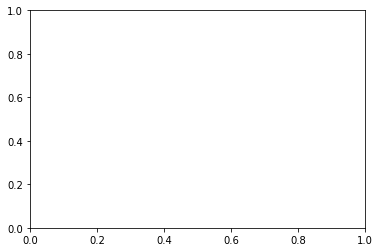

In [105]:
plt.scatter(x=bins_c,y=comb_mean);
#plt.xlabel('Displacement (l)')
#plt.ylabel('Avg. Combined Fuel Eff. (mpg)');